<a href="https://colab.research.google.com/github/vhppacheco/ic-ita-finance-ia/blob/main/sp500_analysis/SP500_index_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libs

In [ ]:
!pip install -q yfinance
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install sqldf
!pip install -q tsfeatures
!pip install umap-learn

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 10.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 968 kB 5.0 MB/s 
     |████████████████████████████████| 138 kB 60.1 MB/s 
     |████████████████████████████████| 359 kB 47.8 MB/s 
     |████████████████████████████████| 3.6 MB 38.7 MB/s 
     |████████████████████████████████| 55 kB 4.1 MB/s 
     |████████████████████████████████| 58 kB 5.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's depend

In [ ]:
import requests
import pandas as pd
from time import sleep
import yfinance as yf
from bs4 import BeautifulSoup
from selenium import webdriver
import json
import sys
import datetime

from google.colab import drive
drive.mount('/content/drive')

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: use options instead of chrome_options
  app.launch_new_instance()


#Getting S&P 500 assets list

##Getting S&P 500 assets list from Business Insider

In [ ]:
for i in range(1,12):
	url = 'https://markets.businessinsider.com/index/s&p_500?p={}'.format(i)
	#sleep(5)
	html = requests.get(url).content
	df_list = pd.read_html(html)
	if i == 1:
		df = df_list[0]
		df['pagina'] = '{}'.format(i)
	else:
		df_i = df_list[0]
		df_i['pagina'] = '{}'.format(i)
		df = pd.concat([df,df_i])
sp500_bi = df.copy()

KeyboardInterrupt: ignored

In [ ]:
sp500_bi

##Getting S&P 500 assets list from Financial Times

In [ ]:
url = 'https://markets.ft.com/data/indices/tearsheet/constituents?s=INX:IOM'
#sleep(5)
html = requests.get(url).content
df_list = pd.read_html(html)
sp500_ft = df_list[0]

In [ ]:
sp500_ft

,Equities,Last Price,Today's % value change,1 year % value change
0,3M CoMMM:NYQ,149.94 USD,+0.92%,-20.86%
1,A O Smith CorpAOS:NYQ,67.80 USD,-0.18%,+0.47%
2,Abbott LaboratoriesABT:NYQ,121.89 USD,+0.11%,+0.35%
3,Abbvie IncABBV:NYQ,160.01 USD,-0.02%,+51.10%
4,ABIOMED IncABMD:NSQ,313.34 USD,+2.15%,+4.93%
5,Accenture PLCACN:NYQ,327.47 USD,+0.92%,+23.48%
6,Activision Blizzard IncATVI:NSQ,79.30 USD,+0.58%,-13.22%
7,Adobe IncADBE:NSQ,466.45 USD,+2.84%,+1.36%
8,Advance Auto Parts IncAAP:NYQ,209.40 USD,+1.77%,+14.43%
9,Advanced Micro Devices IncAMD:NSQ,114.78 USD,-0.98%,+46.44%


##Getting S&P 500 assets list from SlickCharts.com

In [ ]:
# Grab content from URL (Pegar conteúdo HTML a partir da URL)
url = "https://www.slickcharts.com/sp500"

driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver.get(url)
driver.implicitly_wait(10)  # in seconds

element = driver.find_element_by_xpath(
        "/html/body/div[2]/div[3]/div[1]/div/div/table")
        
html_content = element.get_attribute('outerHTML')

# Parse HTML (Parsear o conteúdo HTML) - BeaultifulSoup
soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find(name='table')

# Data Structure Conversion (Estruturar conteúdo em um Data Frame) - Pandas
sp500_slickcharts = pd.read_html(str(table))[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  if __name__ == '__main__':


In [ ]:
sp500_slickcharts

,#,Company,Symbol,Weight,Price,Chg,% Chg
0,1,Apple Inc.,AAPL,6.800482,168.00,-0.82,(-0.49%)
1,2,Microsoft Corporation,MSFT,5.948545,302.27,-1.79,(-0.59%)
2,3,Amazon.com Inc.,AMZN,3.748821,3287.00,-10.78,(-0.33%)
3,4,Alphabet Inc. Class A,GOOGL,2.171371,2785.01,-12.35,(-0.44%)
4,5,Tesla Inc,TSLA,2.045316,983.92,-10.06,(-1.01%)
...,...,...,...,...,...,...,...
500,501,Discovery Inc. Class A,DISCA,0.011272,26.72,-0.15,(-0.56%)
501,502,IPG Photonics Corporation,IPGP,0.011163,119.94,1.52,(1.28%)
502,503,Under Armour Inc. Class A,UAA,0.008614,16.92,-0.21,(-1.23%)
503,504,Under Armour Inc. Class C,UA,0.007987,15.54,0.15,(0.97%)


##Getting S&P 500 assets list from Stock Market MBA

In [ ]:
# Grab content from URL (Pegar conteúdo HTML a partir da URL)
url = "https://stockmarketmba.com/stocksinthesp500.php"

driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver.get(url)
driver.implicitly_wait(10)  # in seconds

element = driver.find_element_by_xpath(
        '''//*[@id="ipos"]''')
        
html_content = element.get_attribute('outerHTML')

# Parse HTML (Parsear o conteúdo HTML) - BeaultifulSoup
soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find(name='table')

# Data Structure Conversion (Estruturar conteúdo em um Data Frame) - Pandas
sp500_stockmarketmba = pd.read_html(str(table))[0]
sp500_stockmarketmba = sp500_stockmarketmba[:len(sp500_stockmarketmba)-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  if __name__ == '__main__':


In [ ]:
sp500_stockmarketmba

,Symbol,Description,Category2,Category3,GICS Sector,Price to book value
0,AAPL,Apple Inc,Common stocks,Large cap,Information Technology,37.52
1,MSFT,Microsoft Corp,Common stocks,Large cap,Information Technology,14.02
2,GOOG,Alphabet Inc Class C,Common stocks,Large cap,Communication Services,3.42
3,GOOGL,Alphabet Inc Class A,Common stocks,Large cap,Communication Services,3.25
4,AMZN,Amazon.Com Inc.,Common stocks,Large cap,Consumer Discretionary,11.89
...,...,...,...,...,...,...
500,PENN,Penn National Gaming Inc,Common stocks,Mid cap,Consumer Discretionary,1.78
501,ALK,Alaska Air Group Inc,Common stocks,Mid cap,Industrials,1.78
502,IPGP,IPG Photonics Corp,Common stocks,Mid cap,Information Technology,2.25
503,PVH,PVH Corp,Common stocks,Mid cap,Consumer Discretionary,1.10


##Checando as bases (Slick Charts vs Stock Market MBA)

In [ ]:
len(pd.merge(sp500_slickcharts,sp500_stockmarketmba,how='inner',on='Symbol'))-len(sp500_slickcharts)

0

#Getting financial statements and performance indicators

##Setting Parameters

In [ ]:
stock_list = sp500_slickcharts['Symbol']
print('len stock list', len(stock_list))
stock_historical = yf.download(stock_list[0], start = '2016-01-01', end = '2021-12-31')['Adj Close'].head(0)
stock_data = yf.Ticker(stock_list[0]) 
stock_financials = pd.merge(stock_data.quarterly_financials.reset_index(),stock_data.financials.reset_index(),how='left',on='index').head(0)
stock_balancesheet = pd.merge(stock_data.balance_sheet.reset_index(),stock_data.quarterly_balance_sheet.reset_index(),how='left',on='index').head(0)
stock_analysis = stock_data.analysis.copy().head(0)

asset_issue = []

len stock list 505
[*********************100%***********************]  1 of 1 completed


##Financials

In [ ]:
# Getting the financials from assets
i=0
for asset in stock_list:
  i+=1
  print(i)

  asset_i = pd.DataFrame(yf.download(asset, start = '2016-01-01', end = '2021-12-31')['Adj Close'])
  asset_i['Stock'] = asset
  stock_historical = pd.concat([stock_historical,asset_i])

  if len(asset_i)>0:
    stock_data = yf.Ticker(asset) 
    if len(stock_data.quarterly_financials)>0 and len(stock_data.financials)>0:
      stock_financials_i = pd.merge(stock_data.quarterly_financials.reset_index(),stock_data.financials.reset_index(),how='left',on='index')
      stock_financials_i['stock'] = asset

      stock_financials = pd.concat([stock_financials,stock_financials_i])

stock_financials.to_csv('stock_financials.csv')
stock_financials.to_excel('stock_financials.xlsx')

In [ ]:
stock_financials_i

,index,2021-12-25 00:00:00,2021-09-25 00:00:00_x,2021-06-26 00:00:00,2021-03-27 00:00:00,2021-09-25 00:00:00_y,2020-09-26 00:00:00,2019-09-28 00:00:00,2018-09-29 00:00:00,stock
0,Research Development,6306000000.0,5772000000.0,5717000000.0,5262000000.0,21914000000.0,18752000000.0,16217000000.0,14236000000.0,AAPL
1,Effect Of Accounting Charges,None,None,None,None,None,None,None,None,AAPL
2,Income Before Tax,41241000000.0,23248000000.0,24369000000.0,28011000000.0,109207000000.0,67091000000.0,65737000000.0,72903000000.0,AAPL
3,Minority Interest,None,None,None,None,None,None,None,None,AAPL
4,Net Income,34630000000.0,20551000000.0,21744000000.0,23630000000.0,94680000000.0,57411000000.0,55256000000.0,59531000000.0,AAPL
5,Selling General Administrative,6449000000.0,5616000000.0,5412000000.0,5314000000.0,21973000000.0,19916000000.0,18245000000.0,16705000000.0,AAPL
6,Gross Profit,54243000000.0,35174000000.0,35255000000.0,38079000000.0,152836000000.0,104956000000.0,98392000000.0,101839000000.0,AAPL
7,Ebit,41488000000.0,23786000000.0,24126000000.0,27503000000.0,108949000000.0,66288000000.0,63930000000.0,70898000000.0,AAPL
8,Operating Income,41488000000.0,23786000000.0,24126000000.0,27503000000.0,108949000000.0,66288000000.0,63930000000.0,70898000000.0,AAPL
9,Other Operating Expenses,None,None,None,None,None,None,None,None,AAPL


##Balance Sheets

In [ ]:
# Getting the balance sheet from assets
i=0
for asset in stock_list:
  i+=1
  print(i)

  asset_i = pd.DataFrame(yf.download(asset, start = '2016-01-01', end = '2021-12-31')['Adj Close'])
  asset_i['Stock'] = asset
  stock_historical = pd.concat([stock_historical,asset_i])

  if len(asset_i)>0:
    stock_data = yf.Ticker(asset) 

    if len(stock_data.balance_sheet)>0 and len(stock_data.quarterly_balance_sheet)>0:
      stock_balancesheet_i = pd.merge(stock_data.balance_sheet.reset_index(),stock_data.quarterly_balance_sheet.reset_index(),how='left',on='index')
      stock_balancesheet_i['stock'] = asset
      stock_balancesheet = pd.concat([stock_balancesheet,stock_balancesheet_i])

stock_balancesheet.to_csv('stock_balancesheet.csv')
stock_balancesheet.to_excel('stock_balancesheet.xlsx')

In [ ]:
stock_balancesheet

,DRE,2021-09,2020-09,2019-09,2018-09,2021-09,2021-06,2021-03,2020-12,2021-12,...,2021-12,2021-08,2020-08,2019-07,2018-07,2021-08,2020-11,2018-02,2021-03,2021-03
0,Total Liab,2.879120e+11,2.585490e+11,2.480280e+11,2.585780e+11,2.879120e+11,2.655600e+11,2.679800e+11,NaN,3.092590e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total Stockholder Equity,6.309000e+10,6.533900e+10,9.048800e+10,1.071470e+11,6.309000e+10,6.428000e+10,6.917800e+10,NaN,7.193200e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Other Current Liab,5.357700e+10,4.786700e+10,4.324200e+10,3.929300e+10,5.357700e+10,5.130600e+10,5.325500e+10,NaN,5.704300e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total Assets,3.510020e+11,3.238880e+11,3.385160e+11,3.657250e+11,3.510020e+11,3.298400e+11,3.371580e+11,NaN,3.811910e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Common Stock,5.736500e+10,5.077900e+10,4.517400e+10,4.020100e+10,5.736500e+10,5.498900e+10,5.420300e+10,NaN,5.842400e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12874,Net Tangible Assets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12875,Net Receivables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12876,Long Term Debt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12877,Inventory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Performance Indicators

In [ ]:
#Getting assets performance indicators
i=0
for asset in stock_list:
  i+=1
  print(i)

  asset_i = pd.DataFrame(yf.download(asset, start = '2016-01-01', end = '2021-12-31')['Adj Close'])
  asset_i['Stock'] = asset
  stock_historical = pd.concat([stock_historical,asset_i])

  if len(asset_i)>0:
    stock_data = yf.Ticker(asset) 

    if asset not in ('SBUX','V','T','C','F','D','A','O','J','K','L','WTW','PARA','AMP','SYF','APA'):
                 
      stock_analysis_i = stock_data.analysis.copy()
      stock_analysis_i['stock'] = asset
      stock_analysis = pd.concat([stock_analysis,stock_analysis_i])

  else:
    asset_issue.append(asset)
    print('issues: ',len(asset_issue))

In [ ]:
#Run this code cell if the previous code cell encounters a problem (an asset that has no performance indicators on Yahoo Finance)

for asset in stock_list[i:]:
  i+=1
  print(i)

  asset_i = pd.DataFrame(yf.download(asset, start = '2016-01-01', end = '2021-12-31')['Adj Close'])
  asset_i['Stock'] = asset
  stock_historical = pd.concat([stock_historical,asset_i])

  if len(asset_i)>0:
    stock_data = yf.Ticker(asset) 

    if asset not in ('SBUX','V','T','C','F','D','A','O','J','K','L','WTW','PARA','AMP','SYF','APA'):
                 
      stock_analysis_i = stock_data.analysis.copy()
      stock_analysis_i['stock'] = asset
      stock_analysis = pd.concat([stock_analysis,stock_analysis_i])

  else:
    asset_issue.append(asset)
    print('issues: ',len(asset_issue))

stock_analysis.to_csv('stock_analysis.csv')
stock_analysis.to_excel('stock_analysis.xlsx')

In [ ]:
stock_analysis

,Max Age,End Date,Growth,Earnings Estimate Avg,Earnings Estimate Low,Earnings Estimate High,Earnings Estimate Year Ago Eps,Earnings Estimate Number Of Analysts,Earnings Estimate Growth,Revenue Estimate Avg,...,Revenue Estimate Growth,Eps Trend Current,Eps Trend 7Days Ago,Eps Trend 30Days Ago,Eps Trend 60Days Ago,Eps Trend 90Days Ago,Eps Revisions Up Last7Days,Eps Revisions Up Last30Days,Eps Revisions Down Last30Days,Eps Revisions Down Last90Days
Period,,,,,,,,,,,,,,,,,,,,,


##Historical price

In [ ]:
#Getting asset historical price
i=0
for asset in stock_list:
  i+=1
  print(i)
  stock_historical_i = pd.DataFrame(yf.download(asset, start = '2018-01-01', end = '2022-02-28')['Adj Close'])
  stock_historical_i['stock'] = asset                                  
  stock_historical = pd.concat([stock_historical,stock_historical_i])

#stock_historical.to_excel('stock_historical.xlsx')
stock_historical.to_csv('stock_historical.csv')

In [ ]:
stock_historical.loc[(stock_historical['stock'] == 'AAPL')]

,Adj Close,stock
Date,,
2018-01-02,41.135754,AAPL
2018-01-03,41.128597,AAPL
2018-01-04,41.319633,AAPL
2018-01-05,41.790070,AAPL
2018-01-08,41.634853,AAPL
...,...,...
2022-02-18,167.300003,AAPL
2022-02-22,164.320007,AAPL
2022-02-23,160.070007,AAPL


##US_Files

In [ ]:
us_prices = pd.read_csv('/content/drive/MyDrive/IC ITA/us_prices.csv',sep=';')
us_ratios = pd.read_csv('/content/drive/MyDrive/IC ITA/us_ratios.csv',sep=';')

In [ ]:
us_ratios_sp500 = pd.merge(us_ratios, sp500_slickcharts['Symbol'],how='inner',left_on='Ticker',right_on='Symbol')
us_prices_sp500 = pd.merge(us_prices, sp500_slickcharts['Symbol'],how='inner',left_on='Ticker',right_on='Symbol')

In [ ]:
us_ratios_sp500.to_csv('us_ratios_sp500.csv')
us_prices_sp500.to_csv('us_prices_sp500.csv')

#Transforming the data

##Reading data

In [ ]:
stock_indicators = pd.read_csv('/content/stock_analysis.csv')
stock_financials = pd.read_csv('/content/stock_financials.csv')
stock_balancesheet = pd.read_csv('/content/stock_balancesheet.csv')
stock_price = pd.read_csv('/content/stock_historical.csv')

##Historical price

In [ ]:
stock_historical = pd.read_csv('/content/stock_historical.csv')

In [ ]:
stock_historical.drop('0',axis='columns',inplace=True)

In [ ]:
stock_historical.set_index('Date',inplace=True)

In [ ]:
stock_historical_df = stock_historical.groupby(['Date','stock']).sum().reset_index().pivot(index='Date',columns='stock', values='Adj Close')

Método de normalização utilizado

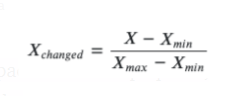

In [ ]:
for column in stock_historical_df.columns:
  stock_historical_df[column] = (stock_historical_df[column]-min(stock_historical_df[column].dropna()))/(max(stock_historical_df[column].dropna())-min(stock_historical_df[column].dropna()))

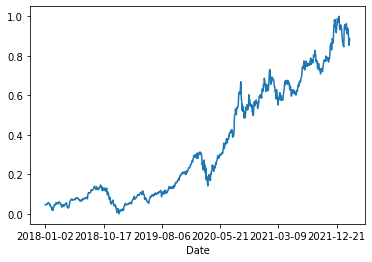

In [ ]:
stock_historical_df['AAPL'].plot()

In [ ]:
stock_historical_df

stock,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.051322,0.888607,0.177289,0.045284,0.262549,0.270757,0.194149,0.023816,0.058333,0.000000,...,0.758228,0.139648,0.735749,0.900521,0.114363,0.253692,0.416024,0.000000,0.439603,0.000786
2018-01-03,0.065282,0.875394,0.182850,0.045235,0.275906,0.275053,0.204580,0.025192,0.060666,0.006540,...,0.746851,0.131326,0.760218,0.894559,0.123998,0.252916,0.424515,0.004033,0.438559,0.002606
2018-01-04,0.061061,0.882102,0.205731,0.046532,0.270962,0.272476,0.215324,0.024134,0.066677,0.010809,...,0.752476,0.121704,0.761976,0.894300,0.129338,0.262124,0.422738,0.008124,0.442212,0.004978
2018-01-05,0.069989,0.881695,0.212566,0.049726,0.285968,0.286470,0.224941,0.025932,0.070915,0.014961,...,0.759443,0.113123,0.760950,0.918663,0.127828,0.267449,0.434981,0.011413,0.442560,0.009557
2018-01-08,0.071207,0.871125,0.207990,0.048672,0.271916,0.305867,0.242106,0.024134,0.075054,0.014373,...,0.745444,0.122224,0.766665,0.930586,0.130730,0.269002,0.437351,0.013546,0.438211,0.014411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-18,0.608369,0.184155,0.864096,0.901717,0.941377,0.983767,0.525843,0.725930,0.674638,0.518652,...,0.340242,0.819663,0.923525,0.634688,0.430922,0.851612,0.422823,0.619764,0.937370,0.687107
2022-02-22,0.595306,0.174979,0.792486,0.881488,0.957655,0.971361,0.520392,0.734093,0.674393,0.510506,...,0.309021,0.817915,0.906847,0.642717,0.422988,0.830940,0.442669,0.599111,0.940687,0.680206
2022-02-23,0.557710,0.158503,0.733247,0.852638,0.970422,0.956976,0.501723,0.731145,0.646629,0.492980,...,0.299791,0.788482,0.912592,0.643520,0.400281,0.801306,0.438700,0.578616,0.917664,0.663010


##Financials

In [ ]:
#columns = stock_financials.drop(['index','stock'],axis='columns').columns
#i=0
#for column in columns:
#  i+=1
#  stock_financials.rename(columns={column:columns[i-1][0:7]},inplace=True)
#stock_financials.drop('Unnamed',axis='columns',inplace=True)

In [ ]:
stock_financials = stock_financials.fillna(0)

In [ ]:
stock_financials.rename(columns={'index':'DRE'},inplace=True)

In [ ]:
var = stock_financials.drop(['DRE','stock'],axis='columns').columns
stock_financials_df=pd.melt(stock_financials, id_vars=['DRE','stock'],value_vars=vars,var_name='dt ref',value_name='Result')
#stock_financials_df.to_csv('stock_financials_df.csv')

In [ ]:
stock_financials

,Unnamed: 0,DRE,2021-12-25 00:00:00,2021-09-25 00:00:00_x,2021-06-26 00:00:00,2021-03-27 00:00:00,2021-09-25 00:00:00_y,2020-09-26 00:00:00,2019-09-28 00:00:00,2018-09-29 00:00:00,...,2021-12-26 00:00:00_y,2021-08-01 00:00:00_x,2021-08-01 00:00:00_y,2020-08-02 00:00:00,2019-07-28 00:00:00,2018-07-29 00:00:00,2020-11-29 00:00:00,2018-02-04 00:00:00,2021-03-27 00:00:00_x,2021-03-27 00:00:00_y
0,0,Research Development,6.306000e+09,5.772000e+09,5.717000e+09,5.262000e+09,2.191400e+10,1.875200e+10,1.621700e+10,1.423600e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Effect Of Accounting Charges,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Income Before Tax,4.124100e+10,2.324800e+10,2.436900e+10,2.801100e+10,1.092070e+11,6.709100e+10,6.573700e+10,7.290300e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Minority Interest,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Net Income,3.463000e+10,2.055100e+10,2.174400e+10,2.363000e+10,9.468000e+10,5.741100e+10,5.525600e+10,5.953100e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10907,17,Cost Of Revenue,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10908,18,Total Other Income Expense Net,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10909,19,Discontinued Operations,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10910,20,Net Income From Continuing Ops,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import sqldf

In [ ]:
query = '''
SELECT
stock,
DRE,
"2017-11-30 00:00:00" as "2017-11",
"2017-12-29 00:00:00"+
"2017-12-30 00:00:00"+
"2017-12-31 00:00:00" as "2017-12",
"2018-01-28 00:00:00"+
"2018-01-31 00:00:00"as "2018-01",
"2018-02-02 00:00:00" +
"2018-02-03 00:00:00" +
"2018-02-04 00:00:00" +
"2018-02-28 00:00:00" as "2018-02",
"2018-03-30 00:00:00" +
"2018-03-31 00:00:00" as "2018-03",
"2018-04-27 00:00:00" +
"2018-04-30 00:00:00" as "2018-04",
"2018-05-27 00:00:00" +
"2018-05-31 00:00:00" as "2018-05",
"2018-06-24 00:00:00" +
"2018-06-29 00:00:00" +
"2018-06-30 00:00:00" as "2018-06",
"2018-07-28 00:00:00" +
"2018-07-29 00:00:00" +
"2018-07-31 00:00:00" as "2018-07",
"2018-08-25 00:00:00" +
"2018-08-30 00:00:00" +
"2018-08-31 00:00:00" as "2018-08",
"2018-09-02 00:00:00" +
"2018-09-28 00:00:00" +
"2018-09-29 00:00:00" +
"2018-09-30 00:00:00" as "2018-09",
"2018-10-28 00:00:00" +
"2018-10-31 00:00:00" as "2018-10",
"2018-11-03 00:00:00" +
"2018-11-04 00:00:00" +
"2018-11-30 00:00:00" as "2018-11",
"2018-12-28 00:00:00" +
"2018-12-29 00:00:00" +
"2018-12-30 00:00:00" +
"2018-12-31 00:00:00" as "2018-12",
"2019-01-27 00:00:00" +
"2019-01-31 00:00:00" as "2019-01",
"2019-02-01 00:00:00" +
"2019-02-02 00:00:00" +
"2019-02-03 00:00:00" +
"2019-02-28 00:00:00" as "2019-02",
"2019-03-29 00:00:00" +
"2019-03-30 00:00:00" +
"2019-03-31 00:00:00" as "2019-03",
"2019-04-26 00:00:00" +
"2019-04-30 00:00:00" as "2019-04",
"2019-05-26 00:00:00" +
"2019-05-31 00:00:00" as "2019-05",
"2019-06-28 00:00:00" +
"2019-06-29 00:00:00" +
"2019-06-30 00:00:00" as "2019-06",
"2019-07-27 00:00:00" +
"2019-07-28 00:00:00" +
"2019-07-31 00:00:00" as "2019-07",
"2019-08-29 00:00:00" +
"2019-08-31 00:00:00" as "2019-08",
"2019-09-01 00:00:00" +
"2019-09-27 00:00:00" +
"2019-09-28 00:00:00" +
"2019-09-29 00:00:00" +
"2019-09-30 00:00:00" as "2019-09",
"2019-10-27 00:00:00" +
"2019-10-31 00:00:00" as "2019-10",
"2019-11-02 00:00:00" +
"2019-11-03 00:00:00" +
"2019-11-29 00:00:00" +
"2019-11-30 00:00:00" as "2019-11",
"2019-12-28 00:00:00" +
"2019-12-29 00:00:00" +
"2019-12-31 00:00:00" as "2019-12",
"2020-01-03 00:00:00" +
"2020-01-04 00:00:00" +
"2020-01-26 00:00:00" +
"2020-01-31 00:00:00" as "2020-01",
"2020-02-01 00:00:00" +
"2020-02-02 00:00:00" +
"2020-02-29 00:00:00" as "2020-02",
"2020-03-28 00:00:00" +
"2020-03-31 00:00:00" as "2020-03",
"2020-04-03 00:00:00" +
"2020-04-24 00:00:00" +
"2020-04-30 00:00:00" as "2020-04",
"2020-05-31 00:00:00" as "2020-05",
"2020-06-27 00:00:00" +
"2020-06-28 00:00:00" +
"2020-06-30 00:00:00" as "2020-06",
"2020-07-03 00:00:00" +
"2020-07-25 00:00:00" +
"2020-07-31 00:00:00" as "2020-07",
"2020-08-02 00:00:00" +
"2020-08-29 00:00:00" +
"2020-08-30 00:00:00" +
"2020-08-31 00:00:00" as "2020-08",
"2020-09-03 00:00:00" +
"2020-09-25 00:00:00" +
"2020-09-26 00:00:00" +
"2020-09-27 00:00:00" +
"2020-09-30 00:00:00" as "2020-09",
"2020-10-02 00:00:00" +
"2020-10-03 00:00:00" +
"2020-10-25 00:00:00" +
"2020-10-31 00:00:00" as "2020-10",
"2020-11-01 00:00:00" +
"2020-11-27 00:00:00" +
"2020-11-29 00:00:00" +
"2020-11-30 00:00:00" +
"2020-11-30 00:00:00_x" +
"2020-11-30 00:00:00_y" as "2020-11",
"2020-12-26 00:00:00" +
"2020-12-26 00:00:00_x" +
"2020-12-26 00:00:00_y" +
"2020-12-27 00:00:00" +
"2020-12-31 00:00:00" +
"2020-12-31 00:00:00_x" +
"2020-12-31 00:00:00_y" as "2020-12",
"2021-01-01 00:00:00" +
"2021-01-01 00:00:00_x" +
"2021-01-01 00:00:00_y" +
"2021-01-02 00:00:00" +
"2021-01-02 00:00:00_x" +
"2021-01-02 00:00:00_y" +
"2021-01-03 00:00:00" +
"2021-01-03 00:00:00_x" +
"2021-01-03 00:00:00_y" +
"2021-01-23 00:00:00" +
"2021-01-24 00:00:00" +
"2021-01-29 00:00:00" +
"2021-01-29 00:00:00_x" +
"2021-01-29 00:00:00_y" +
"2021-01-30 00:00:00" +
"2021-01-30 00:00:00_x" +
"2021-01-30 00:00:00_y" +
"2021-01-31 00:00:00" +
"2021-01-31 00:00:00_x" +
"2021-01-31 00:00:00_y" as "2021-01",
"2021-02-13 00:00:00" +
"2021-02-14 00:00:00" +
"2021-02-28 00:00:00" +
"2021-02-28 00:00:00_x" +
"2021-02-28 00:00:00_y" as "2021-02",
"2021-03-04 00:00:00" +
"2021-03-05 00:00:00" +
"2021-03-20 00:00:00" +
"2021-03-26 00:00:00" +
"2021-03-27 00:00:00" +
"2021-03-27 00:00:00_x" +
"2021-03-27 00:00:00_y" +
"2021-03-28 00:00:00" +
"2021-03-31 00:00:00" +
"2021-03-31 00:00:00_x" +
"2021-03-31 00:00:00_y" as "2021-03",
"2021-04-02 00:00:00" +
"2021-04-02 00:00:00_x" +
"2021-04-02 00:00:00_y"+
"2021-04-03 00:00:00" +
"2021-04-03 00:00:00_x" +
"2021-04-03 00:00:00_y" +
"2021-04-04 00:00:00" +
"2021-04-24 00:00:00"+
"2021-04-25 00:00:00" +
"2021-04-30 00:00:00" +
"2021-04-30 00:00:00_x" +
"2021-04-30 00:00:00_y" as "2021-04",
"2021-05-01 00:00:00" +
"2021-05-02 00:00:00"+
"2021-05-08 00:00:00" +
"2021-05-09 00:00:00" +
"2021-05-14 00:00:00" +
"2021-05-30 00:00:00_x" +
"2021-05-30 00:00:00_y" +
"2021-05-31 00:00:00" +
"2021-05-31 00:00:00_x" +
"2021-05-31 00:00:00_y" as "2021-05",
"2021-06-03 00:00:00" +
"2021-06-04 00:00:00" +
"2021-06-12 00:00:00" +
"2021-06-20 00:00:00" +
"2021-06-25 00:00:00" +
"2021-06-26 00:00:00" +
"2021-06-27 00:00:00" +
"2021-06-27 00:00:00_x" +
"2021-06-27 00:00:00_y" +
"2021-06-30 00:00:00" +
"2021-06-30 00:00:00_x" +
"2021-06-30 00:00:00_y" as "2021-06",
"2021-07-02 00:00:00" +
"2021-07-02 00:00:00_x" +
"2021-07-02 00:00:00_y" +
"2021-07-03 00:00:00" +
"2021-07-03 00:00:00_x" +
"2021-07-03 00:00:00_y" +
"2021-07-04 00:00:00" +
"2021-07-17 00:00:00" +
"2021-07-25 00:00:00" +
"2021-07-30 00:00:00"+
"2021-07-31 00:00:00" +
"2021-07-31 00:00:00_x" +
"2021-07-31 00:00:00_y" as "2021-07",
"2021-08-01 00:00:00" +
"2021-08-01 00:00:00_x" +
"2021-08-01 00:00:00_y"+
"2021-08-14 00:00:00" +
"2021-08-28 00:00:00_x"+
"2021-08-28 00:00:00_y" +
"2021-08-29 00:00:00" +
"2021-08-29 00:00:00_x" +
"2021-08-29 00:00:00_y" +
"2021-08-31 00:00:00" +
"2021-08-31 00:00:00_x" +
"2021-08-31 00:00:00_y" as "2021-08",
"2021-09-02 00:00:00_x" +
"2021-09-02 00:00:00_y" +
"2021-09-03 00:00:00" +
"2021-09-04 00:00:00" +
"2021-09-12 00:00:00" +
"2021-09-24 00:00:00_x" +
"2021-09-24 00:00:00_y" +
"2021-09-25 00:00:00" +
"2021-09-25 00:00:00_x" +
"2021-09-25 00:00:00_y" +
"2021-09-26 00:00:00" +
"2021-09-26 00:00:00_x" +
"2021-09-26 00:00:00_y" +
"2021-09-30 00:00:00" +
"2021-09-30 00:00:00_x" +
"2021-09-30 00:00:00_y" as "2021-09",
"2021-10-01 00:00:00" +
"2021-10-01 00:00:00_x" +
"2021-10-01 00:00:00_y" +
"2021-10-02 00:00:00" +
"2021-10-02 00:00:00_x"+
"2021-10-02 00:00:00_y" +
"2021-10-03 00:00:00" +
"2021-10-03 00:00:00_x" +
"2021-10-03 00:00:00_y" +
"2021-10-09 00:00:00" +
"2021-10-29 00:00:00" +
"2021-10-30 00:00:00" +
"2021-10-30 00:00:00_x" +
"2021-10-30 00:00:00_y" +
"2021-10-31 00:00:00" +
"2021-10-31 00:00:00_x" +
"2021-10-31 00:00:00_y" as "2021-10",
"2021-11-06 00:00:00" +
"2021-11-20 00:00:00" +
"2021-11-21 00:00:00" +
"2021-11-28 00:00:00" +
"2021-11-30 00:00:00" +
"2021-11-30 00:00:00_x" +
"2021-11-30 00:00:00_y" as "2021-11",
"2021-12-02 00:00:00" +
"2021-12-03 00:00:00_x" +
"2021-12-03 00:00:00_y" +
"2021-12-24 00:00:00" +
"2021-12-25 00:00:00" +
"2021-12-25 00:00:00_x" +
"2021-12-25 00:00:00_y" +
"2021-12-26 00:00:00" +
"2021-12-26 00:00:00_x" +
"2021-12-26 00:00:00_y" +
"2021-12-31 00:00:00" +
"2021-12-31 00:00:00_x" +
"2021-12-31 00:00:00_y" as "2021-12",
"2022-01-01 00:00:00" +
"2022-01-01 00:00:00_x" +
"2022-01-01 00:00:00_y"+
"2022-01-02 00:00:00"+
"2022-01-02 00:00:00_x" +
"2022-01-02 00:00:00_y" +
"2022-01-31 00:00:00" +
"2022-01-31 00:00:00_x" +
"2022-01-31 00:00:00_y" as "2022-01"
FROM stock_financials
'''
out = sqldf.run(query)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [ ]:
stock_financials

,Unnamed: 0,DRE,2021-12-25 00:00:00,2021-09-25 00:00:00_x,2021-06-26 00:00:00,2021-03-27 00:00:00,2021-09-25 00:00:00_y,2020-09-26 00:00:00,2019-09-28 00:00:00,2018-09-29 00:00:00,...,2021-12-26 00:00:00_y,2021-08-01 00:00:00_x,2021-08-01 00:00:00_y,2020-08-02 00:00:00,2019-07-28 00:00:00,2018-07-29 00:00:00,2020-11-29 00:00:00,2018-02-04 00:00:00,2021-03-27 00:00:00_x,2021-03-27 00:00:00_y
0,0,Research Development,6.306000e+09,5.772000e+09,5.717000e+09,5.262000e+09,2.191400e+10,1.875200e+10,1.621700e+10,1.423600e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Effect Of Accounting Charges,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Income Before Tax,4.124100e+10,2.324800e+10,2.436900e+10,2.801100e+10,1.092070e+11,6.709100e+10,6.573700e+10,7.290300e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Minority Interest,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Net Income,3.463000e+10,2.055100e+10,2.174400e+10,2.363000e+10,9.468000e+10,5.741100e+10,5.525600e+10,5.953100e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10907,17,Cost Of Revenue,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10908,18,Total Other Income Expense Net,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10909,19,Discontinued Operations,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10910,20,Net Income From Continuing Ops,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#pd.DataFrame(stock_financials.columns).to_excel('columns.xlsx')

In [ ]:
#out = out.groupby(['stock','DRE'],dropna=False).sum().reset_index()

In [ ]:
out['1Q18'] = out['2018-04'] + out['2018-05'] + out['2018-06']
out['2Q18'] = out['2018-07'] + out['2018-08'] + out['2018-09']
out['3Q18'] = out['2018-10'] + out['2018-11'] + out['2018-12']
out['4Q18'] = out['2019-01'] + out['2019-02'] + out['2019-03']

out['1Q19'] = out['2019-04'] + out['2019-05'] + out['2019-06']
out['2Q19'] = out['2019-07'] + out['2019-08'] + out['2019-09']
out['3Q19'] = out['2019-10'] + out['2019-11'] + out['2019-12']
out['4Q19'] = out['2020-01'] + out['2020-02'] + out['2020-03']

out['1Q20'] = out['2020-04'] + out['2020-05'] + out['2020-06']
out['2Q20'] = out['2020-07'] + out['2020-08'] + out['2020-09']
out['3Q20'] = out['2020-10'] + out['2020-11'] + out['2020-12']
out['4Q20'] = out['2021-01'] + out['2021-02'] + out['2021-03']

out['1Q21'] = out['2021-04'] + out['2021-05'] + out['2021-06']
out['2Q21'] = out['2021-07'] + out['2021-08'] + out['2021-09']
out['3Q21'] = out['2021-10'] + out['2021-11'] + out['2021-12']
out['4Q21'] = out['2022-01'] #+ out['2022-02'] + out['2022-03']

In [ ]:
columns = [
'stock',
'DRE',
'1Q18',
'2Q18',
'3Q18',
'4Q18',
'1Q19',
'2Q19',
'3Q19',
'4Q19',
'1Q20',
'2Q20',
'3Q20',
'4Q20',
'1Q21',
'2Q21',
'3Q21',
'4Q21'
]
out = out[columns]

In [ ]:
out

,stock,DRE,1Q18,2Q18,3Q18,4Q18,1Q19,2Q19,3Q19,4Q19,1Q20,2Q20,3Q20,4Q20,1Q21,2Q21,3Q21,4Q21
0,AAPL,Research Development,0.000000e+00,1.423600e+10,0.0,0.0,0.000000e+00,1.621700e+10,0.0,0.0,0.000000e+00,1.875200e+10,0.0,5.262000e+09,5.717000e+09,2.768600e+10,6.306000e+09,0.0
1,AAPL,Effect Of Accounting Charges,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
2,AAPL,Income Before Tax,0.000000e+00,7.290300e+10,0.0,0.0,0.000000e+00,6.573700e+10,0.0,0.0,0.000000e+00,6.709100e+10,0.0,2.801100e+10,2.436900e+10,1.324550e+11,4.124100e+10,0.0
3,AAPL,Minority Interest,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
4,AAPL,Net Income,0.000000e+00,5.953100e+10,0.0,0.0,0.000000e+00,5.525600e+10,0.0,0.0,0.000000e+00,5.741100e+10,0.0,2.363000e+10,2.174400e+10,1.152310e+11,3.463000e+10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10907,NWS,Cost Of Revenue,4.904000e+09,0.000000e+00,0.0,0.0,5.639000e+09,0.000000e+00,0.0,0.0,4.927000e+09,0.000000e+00,0.0,1.186000e+09,6.010000e+09,1.244000e+09,1.279000e+09,0.0
10908,NWS,Total Other Income Expense Net,-1.656000e+09,0.000000e+00,0.0,0.0,-2.450000e+08,0.000000e+00,0.0,0.0,-1.896000e+09,0.000000e+00,0.0,1.100000e+07,-3.020000e+08,9.100000e+07,-5.700000e+07,0.0
10909,NWS,Discontinued Operations,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
10910,NWS,Net Income From Continuing Ops,-1.444000e+09,0.000000e+00,0.0,0.0,2.280000e+08,0.000000e+00,0.0,0.0,-1.545000e+09,0.000000e+00,0.0,9.600000e+07,3.740000e+08,2.670000e+08,2.620000e+08,0.0


##Balance Sheet

In [ ]:
stock_balancesheet

,Unnamed: 0,index,2021-09-25 00:00:00_x,2020-09-26 00:00:00,2019-09-28 00:00:00,2018-09-29 00:00:00,2021-09-25 00:00:00_y,2021-06-26 00:00:00,2021-03-27 00:00:00,2020-12-26 00:00:00,...,2021-12-26 00:00:00_y,2021-08-01 00:00:00_x,2020-08-02 00:00:00,2019-07-28 00:00:00,2018-07-29 00:00:00,2021-08-01 00:00:00_y,2020-11-29 00:00:00,2018-02-04 00:00:00,2021-03-27 00:00:00_x,2021-03-27 00:00:00_y
0,0,Total Liab,2.879120e+11,2.585490e+11,2.480280e+11,2.585780e+11,2.879120e+11,2.655600e+11,2.679800e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Total Stockholder Equity,6.309000e+10,6.533900e+10,9.048800e+10,1.071470e+11,6.309000e+10,6.428000e+10,6.917800e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Other Current Liab,5.357700e+10,4.786700e+10,4.324200e+10,3.929300e+10,5.357700e+10,5.130600e+10,5.325500e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Total Assets,3.510020e+11,3.238880e+11,3.385160e+11,3.657250e+11,3.510020e+11,3.298400e+11,3.371580e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Common Stock,5.736500e+10,5.077900e+10,4.517400e+10,4.020100e+10,5.736500e+10,5.498900e+10,5.420300e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12874,22,Net Tangible Assets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12875,23,Net Receivables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12876,24,Long Term Debt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12877,25,Inventory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns = stock_balancesheet.drop(['index','stock'],axis='columns').columns
i=0
for column in columns:
  i+=1
  stock_balancesheet.rename(columns={column:columns[i-1][0:7]},inplace=True)

stock_balancesheet.drop('Unnamed',axis='columns',inplace=True)

stock_balancesheet.rename(columns={'index':'DRE'},inplace=True)

var = stock_balancesheet.drop(['DRE','stock'],axis='columns').columns
stock_balancesheet_df=pd.melt(stock_balancesheet, id_vars=['DRE','stock'],value_vars=vars,var_name='dt ref',value_name='Result')
stock_balancesheet_df.to_csv('stock_balancesheet_df.csv')

In [ ]:
stock_balancesheet_df

,DRE,stock,dt ref,Result
0,Total Liab,AAPL,2021-03,NaN
1,Total Stockholder Equity,AAPL,2021-03,NaN
2,Other Current Liab,AAPL,2021-03,NaN
3,Total Assets,AAPL,2021-03,NaN
4,Common Stock,AAPL,2021-03,NaN
...,...,...,...,...
12874,Net Tangible Assets,NWS,2021-03,NaN
12875,Net Receivables,NWS,2021-03,NaN
12876,Long Term Debt,NWS,2021-03,NaN
12877,Inventory,NWS,2021-03,NaN


#Models Applications

##K-Means short application for Risk x Return (ENCITA)

In [ ]:
prices = stock_historical_df.copy()
prices.columns
prices.dropna(inplace=True)
retorno = prices.pct_change().dropna()
ativos = stock_historical_df.columns.to_list()

In [ ]:
for column in retorno.columns:
  retorno[column] = retorno[column].mean()*252

In [ ]:
import numpy as np
risco = retorno.copy()
for column in risco.columns:
  risco[column] = risco[column].var() * np.sqrt(252)

In [ ]:
retorno_df = retorno[:1].T

In [ ]:
retorno_df = retorno_df.reset_index().rename(columns={'2022-01-20':'return'})

In [ ]:
risco_df = risco[:1].T

In [ ]:
risco_df = risco_df.reset_index().rename(columns={'2022-01-20':'risk'})

In [ ]:
kmeans_input = pd.merge(retorno_df.reset_index(),risco_df.reset_index(),how='inner',on='stock')

In [ ]:
kmeans_input

Date,index_x,stock,return,index_y,risk
0,0,A,-0.663867,0,8.139806e-31
1,1,AAL,0.778412,1,8.139806e-31
2,2,AAP,-1.771491,2,3.255922e-30
3,3,AAPL,-0.009088,3,4.471329e-34
4,4,ABBV,1.642600,4,8.139806e-31
...,...,...,...,...,...
498,498,YUM,0.067646,498,2.861651e-32
499,499,ZBH,1.622076,499,1.302369e-29
500,500,ZBRA,-2.393778,500,1.302369e-29
501,501,ZION,1.283490,501,8.139806e-31


In [ ]:
kmeans_input = kmeans_input[['stock','risk','return']]

In [ ]:
kmeans_input['risk'] = kmeans_input['risk'].astype(float)
kmeans_input['return'] = kmeans_input['return'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
kmeans_input.sort_values('risk')

Date,stock,risk,return
502,ZTS,0.000000e+00,-0.373006
61,BIO,0.000000e+00,1.218123
458,UDR,0.000000e+00,-0.353394
459,UHS,0.000000e+00,2.379472
380,PSA,0.000000e+00,0.378329
...,...,...,...
467,VFC,1.172132e-28,-4.922905
281,LUMN,1.172132e-28,-4.027848
347,OGN,4.688528e-28,10.036234
60,BIIB,NaN,inf


In [ ]:
kmeans_input.sort_values('return')

Date,stock,risk,return
386,PYPL,1.172132e-28,-7.274648
199,GILD,5.209476e-29,-6.263019
179,FB,1.302369e-29,-6.219799
467,VFC,1.172132e-28,-4.922905
304,MMM,0.000000e+00,-4.333873
...,...,...,...
226,HSIC,1.302369e-29,3.572406
441,TMUS,5.209476e-29,3.620403
347,OGN,4.688528e-28,10.036234
60,BIIB,NaN,inf


In [ ]:
kmeans_input['risk'] = (kmeans_input['risk']-min(kmeans_input['risk'].dropna()))/(max(kmeans_input['risk'].dropna())-min(kmeans_input['risk'].dropna()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
kmeans_input = kmeans_input.loc[kmeans_input['return'].astype(float)<=1000]
kmeans_input['return'] = (kmeans_input['return']-min(kmeans_input['return'].dropna()))/(max(kmeans_input['return'].dropna())-min(kmeans_input['return'].dropna()))

In [ ]:
kmeans_input = kmeans_input.loc[(kmeans_input['return'].astype(float)<1)]
kmeans_input = kmeans_input.loc[(kmeans_input['risk'].astype(float)<1)]

In [ ]:
X = kmeans_input.iloc[:,[1,2]].values

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,12
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
X

array([[1.73611111e-03, 3.81885869e-01],
       [1.73611111e-03, 4.65202185e-01],
       [6.94444444e-03, 3.17901624e-01],
       [9.53674316e-07, 4.19710548e-01],
       [1.73611111e-03, 5.15123807e-01],
       [1.56250000e-02, 5.04560012e-01],
       [1.73611111e-03, 4.87042662e-01],
       [0.00000000e+00, 3.98655968e-01],
       [4.34027778e-04, 3.70265777e-01],
       [1.73611111e-03, 3.45558278e-01],
       [9.76562500e-04, 4.39096976e-01],
       [2.77777778e-02, 5.25249344e-01],
       [6.94444444e-03, 3.34546363e-01],
       [6.25000000e-02, 2.95647405e-01],
       [9.76562500e-04, 4.02121670e-01],
       [2.44140625e-04, 4.27583269e-01],
       [6.94444444e-03, 3.49628031e-01],
       [1.69542101e-06, 4.17982234e-01],
       [6.94444444e-03, 4.81085673e-01],
       [6.25000000e-02, 5.49729545e-01],
       [4.34027778e-04, 4.51663133e-01],
       [0.00000000e+00, 3.48441671e-01],
       [1.73611111e-03, 3.51457523e-01],
       [4.34027778e-04, 4.57097378e-01],
       [1.562500

In [ ]:
WCSS = []

In [ ]:
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

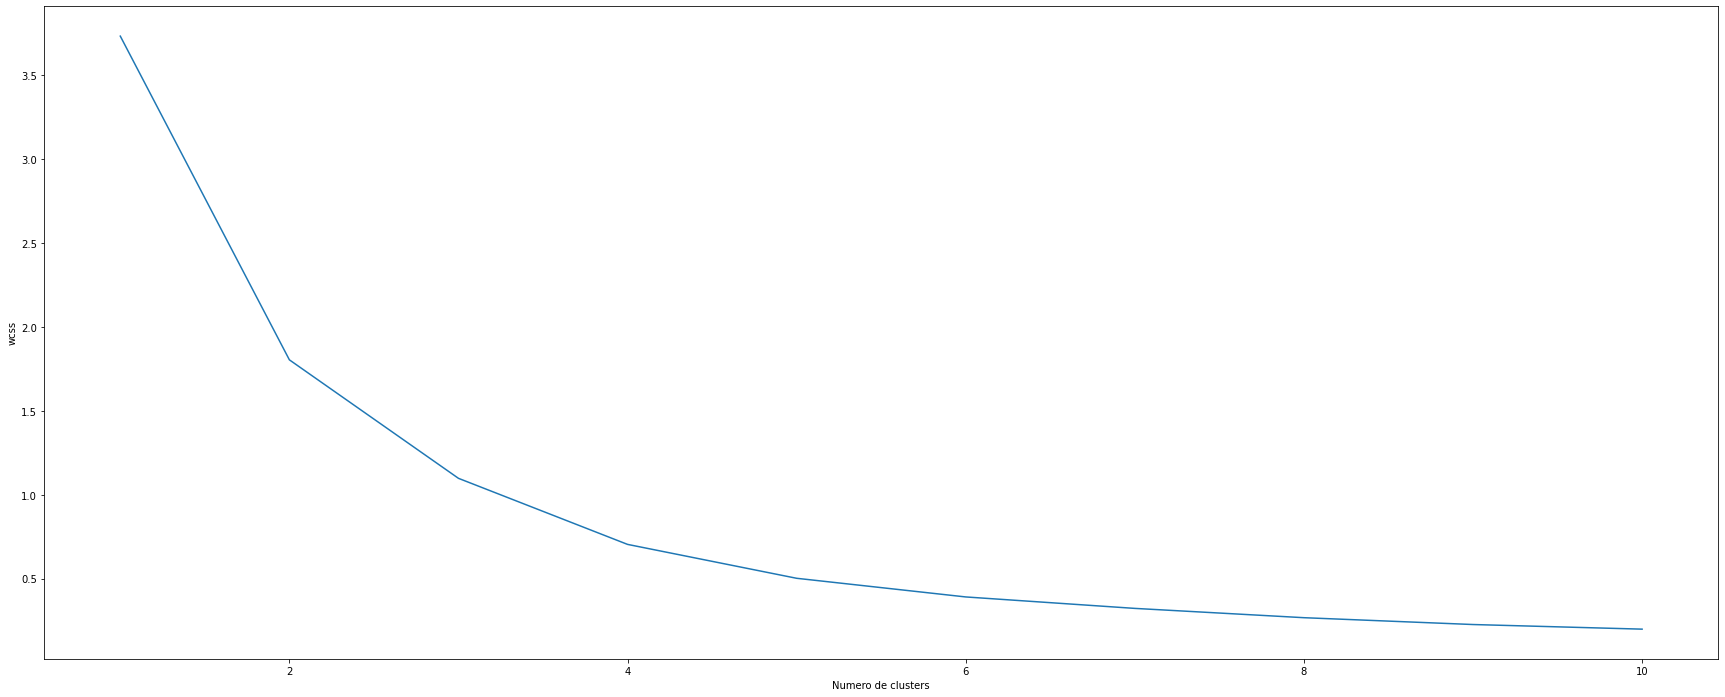

In [ ]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
previsoes = kmeans.fit_predict(X)

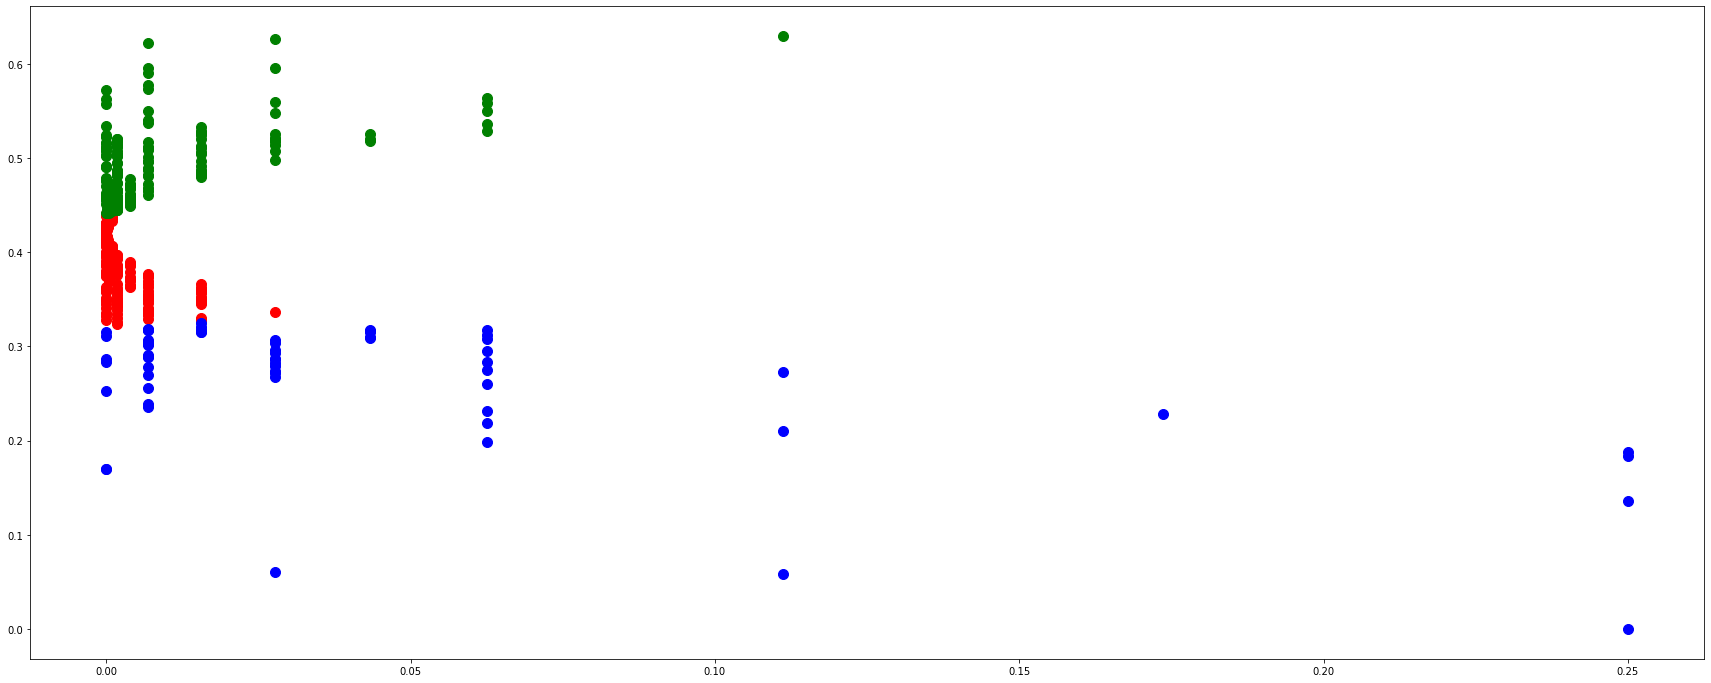

In [ ]:
plt.scatter(X[previsoes == 0,0], X[previsoes == 0,1],s=100, c='red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1,0], X[previsoes == 1,1],s=100, c='green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2,0], X[previsoes == 2,1],s=100, c='blue', label = 'Cluster 3')
#plt.scatter(X[previsoes == 3,0], X[previsoes == 3,1],s=100, c='yellow', label = 'Cluster 4')

In [ ]:
centroides = pd.DataFrame(kmeans.cluster_centers_).reset_index()

In [ ]:
centroides = centroides.rename(columns={0:'Var',1:'Return'})

In [ ]:
centroides['Sharpe ratio'] = centroides['Return']/centroides['Var']

In [ ]:
centroides

,index,Var,Return,Sharpe ratio
0,0,0.002108,0.391669,185.814537
1,1,0.008090,0.489929,60.561360
2,2,0.045580,0.266214,5.840609


In [ ]:
kmeans_output = pd.DataFrame(np.column_stack((kmeans_input, previsoes)))

In [ ]:
kmeans_output

,0,1,2,3
0,A,0.001736,0.381886,0
1,AAL,0.001736,0.465202,1
2,AAP,0.006944,0.317902,2
3,AAPL,0.000001,0.419711,0
4,ABBV,0.001736,0.515124,1
...,...,...,...,...
495,YUM,0.000061,0.424143,0
496,ZBH,0.027778,0.513938,1
497,ZBRA,0.027778,0.281954,2
498,ZION,0.001736,0.494379,1


In [ ]:
kmeans_output = kmeans_output.rename(columns={0:'Stock',1:'Var',2:'Return',3:'Cluster'})

In [ ]:
sharpe = kmeans_output.groupby('Cluster').mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
sharpe['Sharpe ratio'] = sharpe['Return']/sharpe['Var']

In [ ]:
sharpe

,Var,Return,Sharpe ratio
Cluster,,,
0,0.002100,0.391860,186.628749
1,0.008135,0.490202,60.258459
2,0.045580,0.266214,5.840609


In [ ]:
kmeans_output.loc[kmeans_output['Cluster'].astype(str)=='0']['Stock'].drop_duplicates()

0         A
3      AAPL
7       ABT
8       ACN
9      ADBE
       ... 
488     WTW
490    WYNN
491     XEL
495     YUM
499     ZTS
Name: Stock, Length: 258, dtype: object

##TsFeatures Application

In [ ]:
from tsfeatures import tsfeatures

In [ ]:
stock_historical_df

stock,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.051322,0.888607,0.177289,0.045284,0.262549,0.270757,0.194149,0.023816,0.058333,0.000000,...,0.758228,0.139648,0.735749,0.900521,0.114363,0.253692,0.416024,0.000000,0.439603,0.000786
2018-01-03,0.065282,0.875394,0.182850,0.045235,0.275906,0.275053,0.204580,0.025192,0.060666,0.006540,...,0.746851,0.131326,0.760218,0.894559,0.123998,0.252916,0.424515,0.004033,0.438559,0.002606
2018-01-04,0.061061,0.882102,0.205731,0.046532,0.270962,0.272476,0.215324,0.024134,0.066677,0.010809,...,0.752476,0.121704,0.761976,0.894300,0.129338,0.262124,0.422738,0.008124,0.442212,0.004978
2018-01-05,0.069989,0.881695,0.212566,0.049726,0.285968,0.286470,0.224941,0.025932,0.070915,0.014961,...,0.759443,0.113123,0.760950,0.918663,0.127828,0.267449,0.434981,0.011413,0.442560,0.009557
2018-01-08,0.071207,0.871125,0.207990,0.048672,0.271916,0.305867,0.242106,0.024134,0.075054,0.014373,...,0.745444,0.122224,0.766665,0.930586,0.130730,0.269002,0.437351,0.013546,0.438211,0.014411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-18,0.608369,0.184155,0.864096,0.901717,0.941377,0.983767,0.525843,0.725930,0.674638,0.518652,...,0.340242,0.819663,0.923525,0.634688,0.430922,0.851612,0.422823,0.619764,0.937370,0.687107
2022-02-22,0.595306,0.174979,0.792486,0.881488,0.957655,0.971361,0.520392,0.734093,0.674393,0.510506,...,0.309021,0.817915,0.906847,0.642717,0.422988,0.830940,0.442669,0.599111,0.940687,0.680206
2022-02-23,0.557710,0.158503,0.733247,0.852638,0.970422,0.956976,0.501723,0.731145,0.646629,0.492980,...,0.299791,0.788482,0.912592,0.643520,0.400281,0.801306,0.438700,0.578616,0.917664,0.663010


In [ ]:
df_log = (stock_historical_df.pct_change(axis=0)).apply(np.log1p).iloc[1:,:]

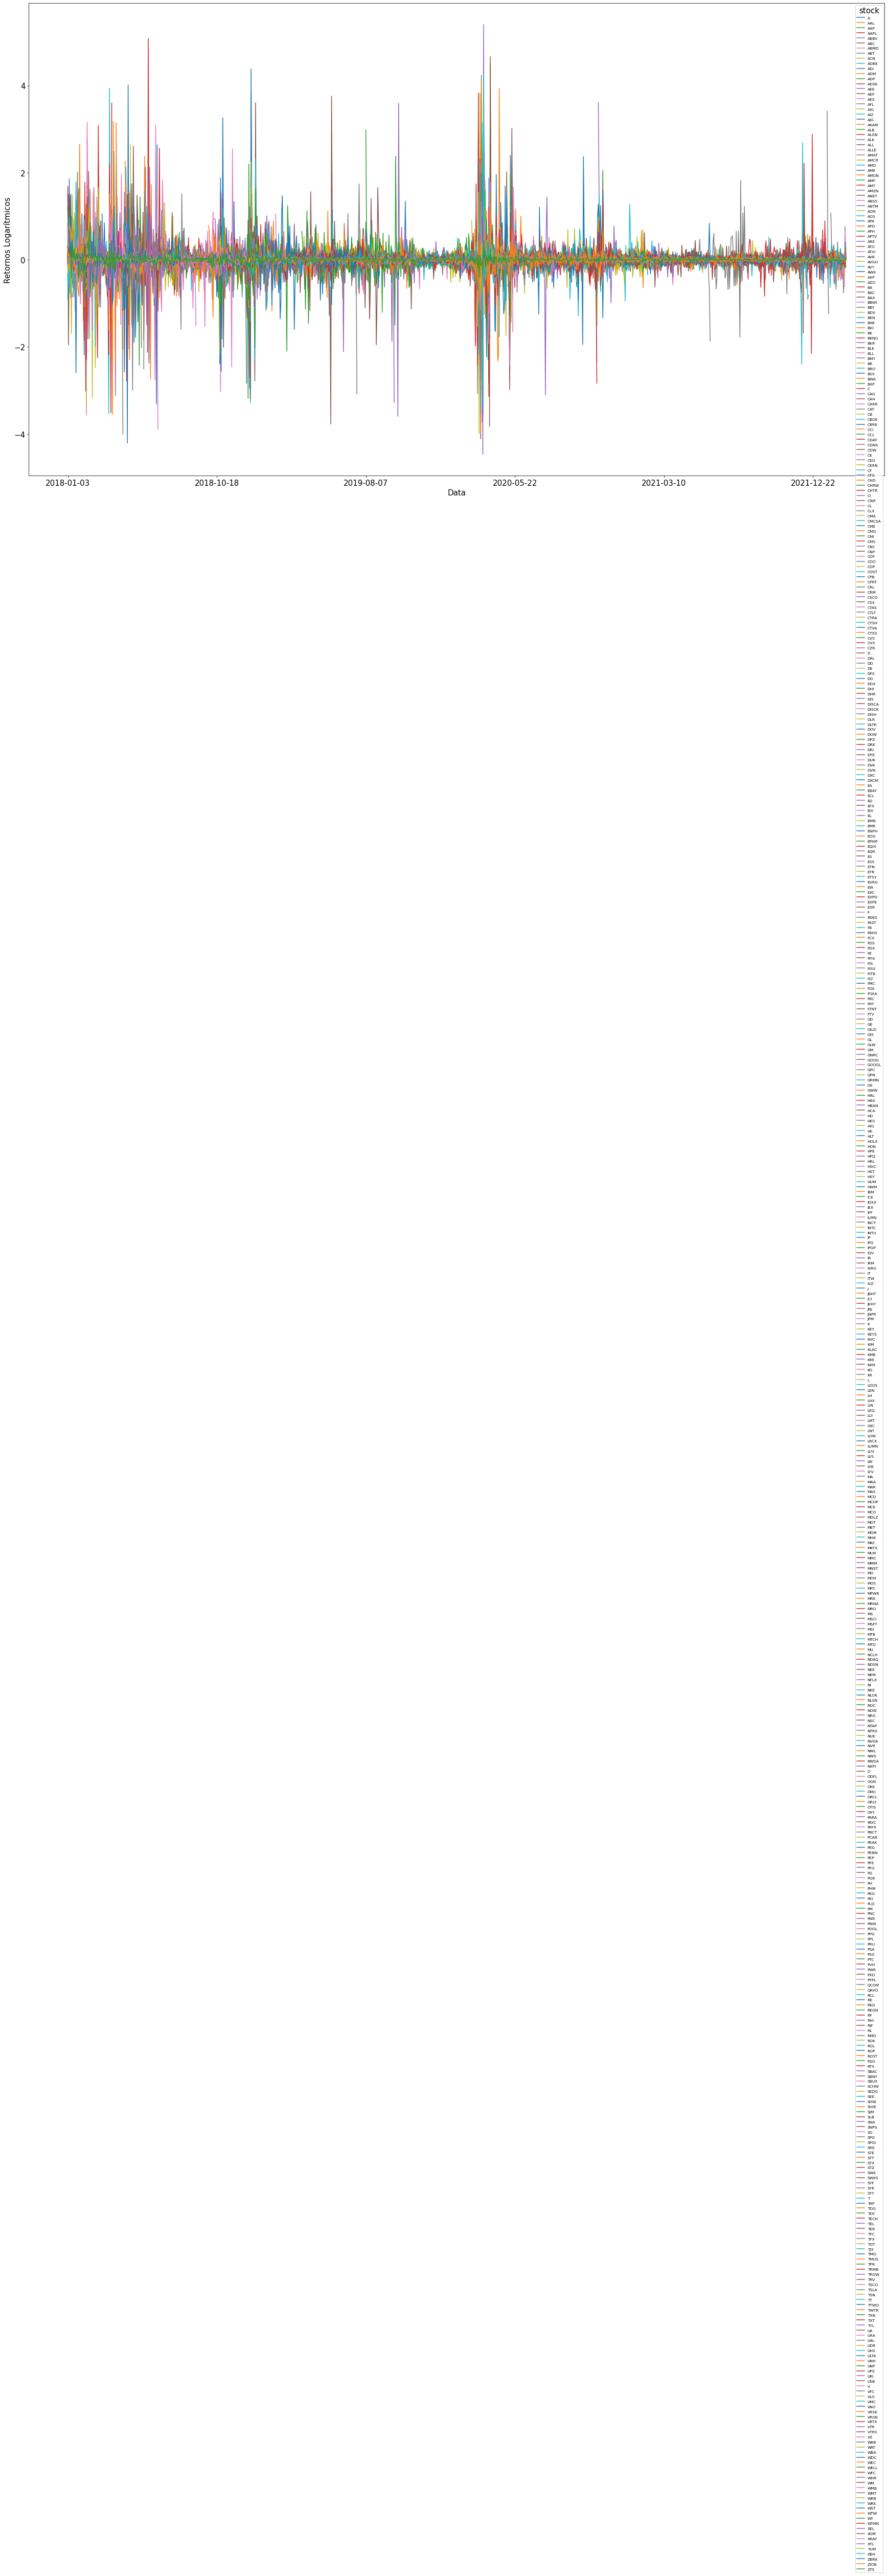

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rc('legend', fontsize=7.45) 
df_log.plot(figsize=(30,17))
plt.ylabel('Retornos Logarítmicos')
plt.xlabel('Data')
plt.show()

In [ ]:
df_ts = df_log.reset_index().melt('Date', var_name=['unique_id'])
df_ts = df_ts.rename(columns={"Date":"ds","value":"y"})
df_ts = df_ts[['unique_id','ds','y']]
df_ts['y'] = df_ts['y'].astype(float)
df_ts['ds'] = pd.to_datetime(df_ts['ds'])
df_ts

,unique_id,ds,y
0,A,2018-01-03,0.240590
1,A,2018-01-04,-0.066834
2,A,2018-01-05,0.136461
3,A,2018-01-08,0.017246
4,A,2018-01-09,0.179018
...,...,...,...
525630,ZTS,2022-02-18,-0.014304
525631,ZTS,2022-02-22,-0.010095
525632,ZTS,2022-02-23,-0.025606
525633,ZTS,2022-02-24,0.032650


In [ ]:
df_ts = df_ts[np.isfinite(df_ts['y']) == True]

In [ ]:
df_features = tsfeatures(df_ts, freq=7)
df_features

,unique_id,hurst,series_length,unitroot_pp,unitroot_kpss,hw_alpha,hw_beta,hw_gamma,stability,nperiods,...,entropy,crossing_points,arch_lm,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1
0,A,0.454056,1043,-1083.157076,0.028382,1.490116e-08,4.869170e-09,0.000000e+00,0.070874,1,...,0.932206,534,0.275730,-0.204211,0.091186,-0.522565,0.323128,-0.646796,0.480836,-0.004602
1,AAL,0.502474,1043,-645.108635,0.059522,1.652056e-08,1.648524e-08,1.141205e-15,0.139890,1,...,0.927064,507,0.175421,0.149658,0.195649,-0.394577,0.369546,-0.649832,0.797821,0.132093
2,AAP,0.608749,1043,-935.870325,0.042151,1.490116e-08,2.794538e-10,0.000000e+00,0.106253,1,...,0.934625,522,0.264272,-0.029923,0.184971,-0.543939,0.569490,-0.702980,0.925277,0.023362
3,AAPL,0.582697,1043,-1084.145963,0.049825,1.490116e-08,1.128859e-08,3.304629e-07,0.122955,1,...,0.936048,523,0.125454,-0.067345,0.041858,-0.486040,0.290845,-0.636290,0.486692,0.067069
4,ABBV,0.532039,1043,-1187.921789,0.115086,3.377044e-08,5.824255e-10,3.035751e-16,0.139440,1,...,0.928550,516,0.043183,-0.222101,0.115502,-0.615601,0.534794,-0.748391,0.834664,0.133110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,YUM,0.712244,1043,-1740.432006,0.083962,1.490116e-08,9.469178e-11,1.046652e-08,0.191427,1,...,0.932644,507,0.200704,-0.177726,0.249932,-0.677777,0.721307,-0.758287,0.901487,0.205187
499,ZBH,0.508757,1043,-1187.138343,0.015495,1.490116e-08,2.430386e-09,0.000000e+00,0.020050,1,...,0.963701,526,0.286722,-0.330093,0.147323,-0.637763,0.485393,-0.752379,0.736104,0.084637
500,ZBRA,0.476391,1044,-1106.733715,0.444193,6.987351e-02,1.082435e-11,1.190000e-10,0.254805,1,...,0.934990,548,0.044234,0.030489,0.059010,-0.558340,0.390794,-0.708617,0.661607,0.079005
501,ZION,0.618550,1043,-1063.541257,0.084178,4.198193e-08,1.659600e-10,0.000000e+00,0.076155,1,...,0.932926,545,0.187860,-0.150218,0.134178,-0.618227,0.528120,-0.769549,0.850206,0.100612


In [ ]:
df_features.columns

Index(['unique_id', 'hurst', 'series_length', 'unitroot_pp', 'unitroot_kpss',
       'hw_alpha', 'hw_beta', 'hw_gamma', 'stability', 'nperiods',
       'seasonal_period', 'trend', 'spike', 'linearity', 'curvature', 'e_acf1',
       'e_acf10', 'seasonal_strength', 'peak', 'trough', 'x_pacf5',
       'diff1x_pacf5', 'diff2x_pacf5', 'seas_pacf', 'nonlinearity',
       'lumpiness', 'alpha', 'beta', 'arch_acf', 'garch_acf', 'arch_r2',
       'garch_r2', 'flat_spots', 'entropy', 'crossing_points', 'arch_lm',
       'x_acf1', 'x_acf10', 'diff1_acf1', 'diff1_acf10', 'diff2_acf1',
       'diff2_acf10', 'seas_acf1'],
      dtype='object')

##UMAP testing

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

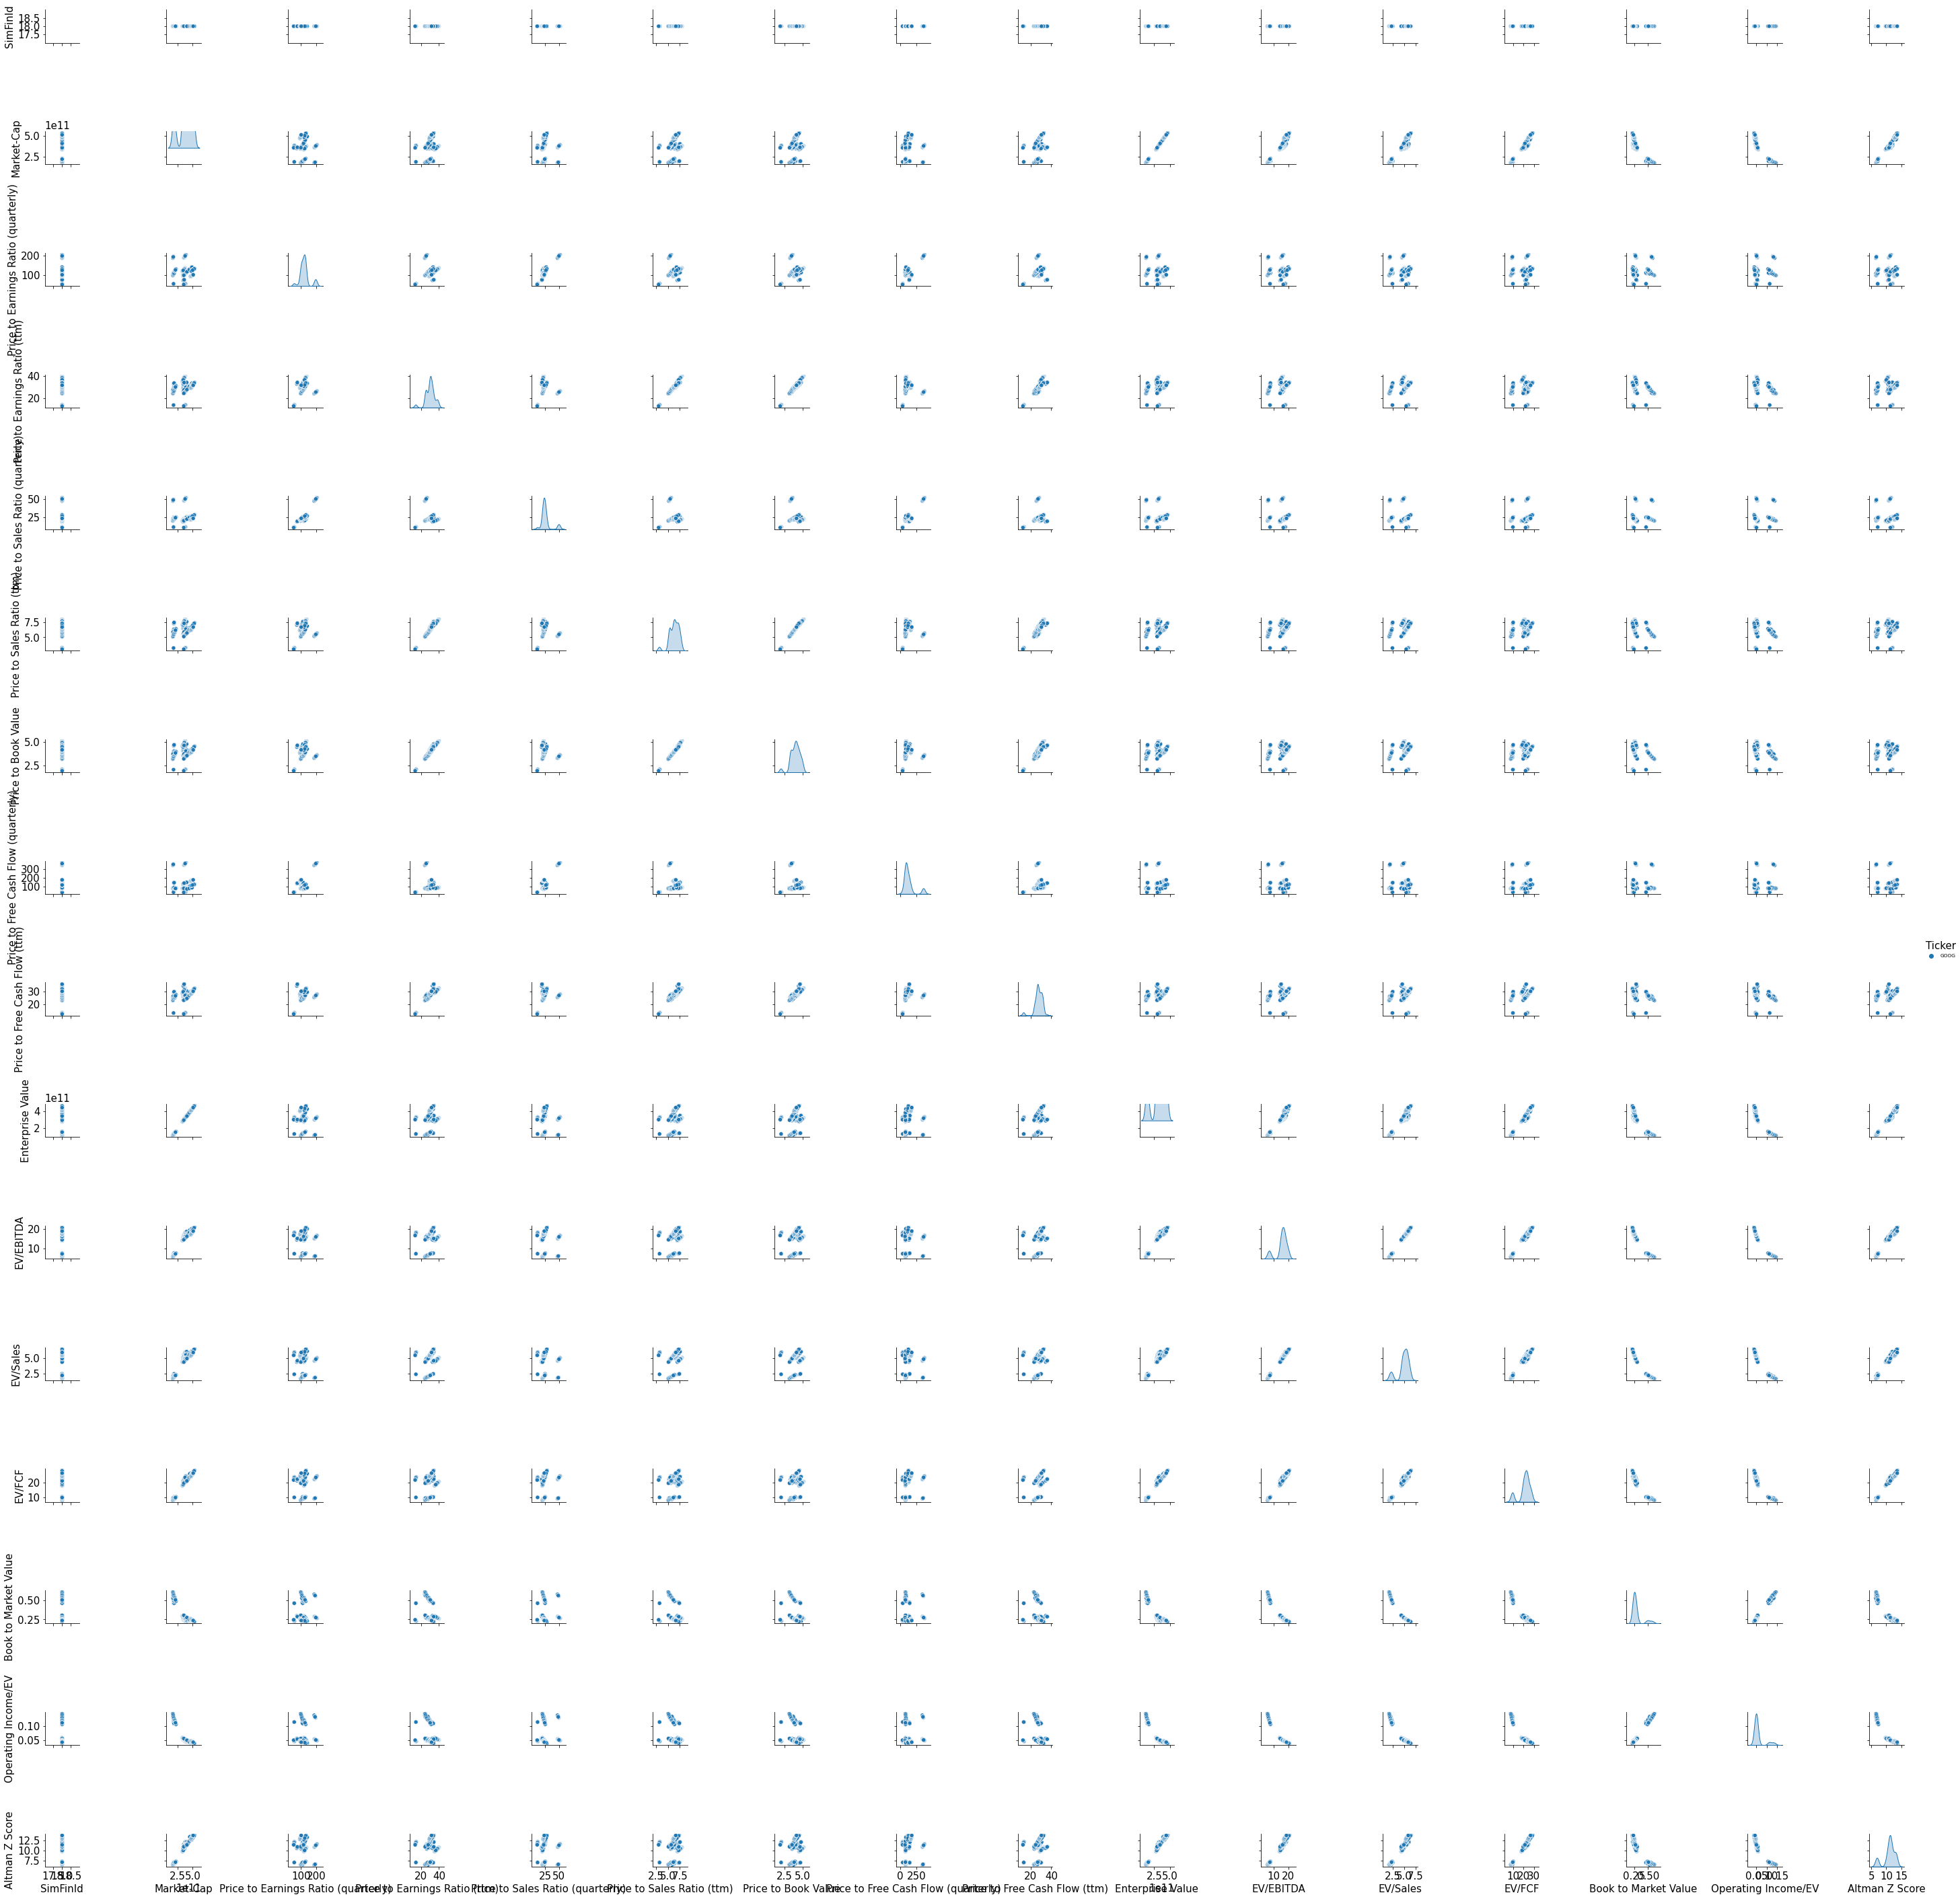

In [ ]:
sns.pairplot(us_ratios_sp500.iloc[:500], hue='Ticker')

In [ ]:
us_ratios_sp500.columns

Index(['Ticker', 'SimFinId', 'Date', 'Market-Cap',
       'Price to Earnings Ratio (quarterly)', 'Price to Earnings Ratio (ttm)',
       'Price to Sales Ratio (quarterly)', 'Price to Sales Ratio (ttm)',
       'Price to Book Value', 'Price to Free Cash Flow (quarterly)',
       'Price to Free Cash Flow (ttm)', 'Enterprise Value', 'EV/EBITDA',
       'EV/Sales', 'EV/FCF', 'Book to Market Value', 'Operating Income/EV',
       'Altman Z Score', 'Symbol'],
      dtype='object')

In [ ]:
import umap

In [ ]:
reducer = umap.UMAP()

In [ ]:
us_ratios_sp500['EV/EBITDA'] = us_ratios_sp500['EV/EBITDA'].loc[us_ratios_sp500['EV/EBITDA'].isnull()==False]
us_ratios_sp500['EV/Sales'] = us_ratios_sp500['EV/Sales'].loc[us_ratios_sp500['EV/Sales'].isnull()==False]
us_ratios_sp500['EV/FCF'] = us_ratios_sp500['EV/FCF'].loc[us_ratios_sp500['EV/FCF'].isnull()==False]
us_ratios_sp500['Operating Income/EV'] = us_ratios_sp500['Operating Income/EV'].loc[us_ratios_sp500['Operating Income/EV'].isnull()==False]

In [ ]:
us_ratios_sp500 = us_ratios_sp500[np.isfinite(us_ratios_sp500['EV/EBITDA']) == True]
us_ratios_sp500 = us_ratios_sp500[np.isfinite(us_ratios_sp500['EV/Sales']) == True]
us_ratios_sp500 = us_ratios_sp500[np.isfinite(us_ratios_sp500['EV/FCF']) == True]
us_ratios_sp500 = us_ratios_sp500[np.isfinite(us_ratios_sp500['Operating Income/EV']) == True]

In [ ]:
us_ratios_sp500_application = us_ratios_sp500.iloc[:500]

In [ ]:
len(us_ratios_sp500)

1296823

In [ ]:
sp500_data = us_ratios_sp500_application[
    [
        "EV/EBITDA",
        "EV/Sales",
        "EV/FCF",
        "Operating Income/EV",
    ]
].values
scaled_sp500_data = StandardScaler().fit_transform(sp500_data)

In [ ]:
embedding = reducer.fit_transform(scaled_sp500_data)
embedding.shape

(500, 2)